## Download IPO set from Audit Analytics data from WRDS

-------------------------

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import wrds
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns=200

### Connect WRDS

In [2]:
conn=wrds.Connection()

Enter your WRDS username [yjaey]: yjaeyoon
Enter your password: ···············


WRDS recommends setting up a .pgpass file.


Create .pgpass file now [y/n]?:  y


Created .pgpass file successfully.
Loading library list...
Done


### Download IPO from Audit Analytics

In [3]:
ipo_vars= conn.describe_table(library='audit', table='ipo')['name']
print(len(ipo_vars))

Approximately 10146 rows in audit.ipo.
209


In [4]:
df= conn.raw_sql(f"""select *
                    from audit.ipo
                    """)
print(df.shape)

(10146, 209)


### Data wrangling

In [5]:
# df = df[df.columns.drop(list(df.filter(regex='matchfy')))]
df = df[df.columns.drop(list(df.filter(regex='matchqu')))]
df = df[df.columns.drop(list(df.filter(regex='priorfy')))]
df = df[df.columns.drop(list(df.filter(regex='priorqu')))]
df = df[df.columns.drop(list(df.filter(regex='closestfy')))]
df = df[df.columns.drop(list(df.filter(regex='closestqu')))]
df.shape

(10146, 63)

In [6]:
for col in df.columns:
    if 'match' not in col:
        print(col)

ipo_info_key
ipo_date
ipo_date_raw
ipo_name
ipo_tick
ipo_shares
ipo_price
prior_ipo_reg_form
prior_ipo_reg_date
auditor_fkey_at_ipo
aud_name_ipo_date
ipo_desc
accounting_fees
legal_fees
curr_code_fkey
curr_accounting_fees
curr_legal_fees
company_fkey
eventdate_aud_fkey
eventdate_aud_name
ipo_type
best_edgar_ticker


In [7]:
df.filter(regex=r'matchfy_incmst.*ttm').dropna().head()

,matchfy_incmst_rev_ttm,matchfy_incmst_netinc_ttm,matchfy_incmst_extraitm_ttm,matchfy_incmst_ebitda_ttm
23,9.329600e+09,-1.829000e+08,0.0,626000000.0
46,1.824899e+09,9.410200e+07,0.0,183560000.0
123,7.417702e+09,1.349440e+08,0.0,837309000.0
188,1.812808e+09,1.559632e+09,0.0,0.0
260,1.789776e+09,7.630000e+07,0.0,0.0


In [8]:
df.rename(columns={'matchfy_incmst_rev_ttm':'rev', 'matchfy_incmst_netinc_ttm':'ni'}, inplace= True)
print(df.shape)
df.tail(5)

(10146, 63)


,ipo_info_key,ipo_date,ipo_date_raw,ipo_name,ipo_tick,ipo_shares,ipo_price,prior_ipo_reg_form,prior_ipo_reg_date,auditor_fkey_at_ipo,aud_name_ipo_date,ipo_desc,accounting_fees,legal_fees,curr_code_fkey,curr_accounting_fees,curr_legal_fees,company_fkey,matchfy_price_date,matchfy_price_close,matchfy_tso_date,matchfy_tso,matchfy_tso_markcap,matchfy_date_qtr,matchfy_date_ttm,matchfy_filing_code_qtr,matchfy_filing_code_ttm,matchfy_annual_quindic,matchfy_balsh_book_val,matchfy_balsh_assets,matchfy_balsh_cash_equivs,matchfy_incmst_rev_qtr,rev,matchfy_incmst_netinc_qtr,ni,matchfy_incmst_extraitm_qtr,matchfy_incmst_extraitm_ttm,matchfy_incmst_ebitda_qtr,matchfy_incmst_ebitda_ttm,matchfy_eff_accchange_qtr,matchfy_eff_accchange_ttm,matchfy_cshflst_op_act_qtr,matchfy_cshflst_op_act_ttm,matchfy_cshflst_inv_act_qtr,matchfy_cshflst_inv_act_ttm,matchfy_cshflst_fin_act_qtr,matchfy_cshflst_fin_act_ttm,matchfy_cshflst_change_qtr,matchfy_cshflst_change_ttm,matchfy_sumfees_fy_end,matchfy_sumfees_fy,matchfy_sum_audfees,matchfy_sum_nonaud,matchfy_sum_benfees,matchfy_sum_itfees,matchfy_sum_taxfees,matchfy_sum_audrel_fees,matchfy_sum_other,matchfy_sum_total,eventdate_aud_fkey,eventdate_aud_name,ipo_type,best_edgar_ticker
10141,10208.0,2022-04-20,20220420.0,Yotta Acquisition Corp,YOTAU,10000000.0,10.0,S-1/A,2022-04-12,8256.0,Marcum LLP,Initial Public Offering,45000.0,275000.0,USD,45000.0,275000.0,0001907730,None,NaN,None,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8256.0,Marcum LLP,Special Purpose Acquisition Company (SPAC),YOTA
10142,10243.0,2022-06-24,20220624.0,SK Growth Opportunities Corp,SKGRU,20000000.0,10.0,S-1/A,2022-06-22,52.0,WithumSmith + Brown PC,Initial Public Offering,40000.0,375000.0,USD,40000.0,375000.0,0001912461,None,NaN,None,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,WithumSmith + Brown PC,Special Purpose Acquisition Company (SPAC),SKGRU
10143,10241.0,2022-06-16,20220616.0,Feutune Light Acquisition Corp,FLFVU,8500000.0,10.0,S-1/A,2022-06-14,1581.0,Friedman LLP,Initial Public Offering,80000.0,250000.0,USD,80000.0,250000.0,0001912582,None,NaN,None,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1581.0,Friedman LLP,Special Purpose Acquisition Company (SPAC),FLFVU
10144,10202.0,2022-04-07,20220407.0,Denali Capital Acquisition Corp.,DECAU,7500000.0,10.0,S-1/A,2022-04-05,1581.0,Friedman LLP,Initial Public Offering,50000.0,300000.0,USD,50000.0,300000.0,0001913577,None,NaN,None,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1581.0,Friedman LLP,Special Purpose Acquisition Company (SPAC),DECA
10145,10238.0,2022-06-10,20220610.0,Acri Capital Acquisition Corp,ACACU,7500000.0,10.0,S-1/A,2022-05-18,1581.0,Friedman LLP,Initial Public Offering,70000.0,250000.0,USD,70000.0,250000.0,0001914023,None,NaN,None,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1581.0,Friedman LLP,Special Purpose Acquisition Company (SPAC),ACACU


In [9]:
df=df[['company_fkey', 'ipo_tick', 'ipo_name', 'ipo_date', 'auditor_fkey_at_ipo', 'accounting_fees', 'legal_fees', 'rev', 'ni', 'ipo_price', 'ipo_shares', 'ipo_type']]
df.dropna(inplace= True)
df.rename(columns={'accounting_fees':'afees', 
                   'legal_fees':'lfees'}, 
          inplace= True)
df['big4']=0
df.loc[df['auditor_fkey_at_ipo']<=4, 'big4']= 1
df['ipo_y']=pd.to_datetime(df['ipo_date']).dt.year
df=df[df.ipo_type != 'Direct Listing']

print(df.shape)
df.head(2)

(4472, 14)


,company_fkey,ipo_tick,ipo_name,ipo_date,auditor_fkey_at_ipo,afees,lfees,rev,ni,ipo_price,ipo_shares,ipo_type,big4,ipo_y
72,0000015615,MTZ,Mastec Inc,1997-02-14,1.0,50000.0,100000.0,6.594390e+08,34664000.0,0.0,0.0,Traditional,1,1997
87,0000018169,DOLE,DOLE FOOD CO INC,2009-10-22,3.0,1500000.0,1000000.0,6.778500e+09,132349500.0,12.5,35720000.0,Traditional,1,2009


In [10]:
df= df[df.ipo_price > 0]

In [11]:
df.shape

(4383, 14)

In [12]:
pd.DataFrame(df.ipo_type.value_counts())

,ipo_type
Traditional,3817
Special Purpose Acquisition Company (SPAC),566


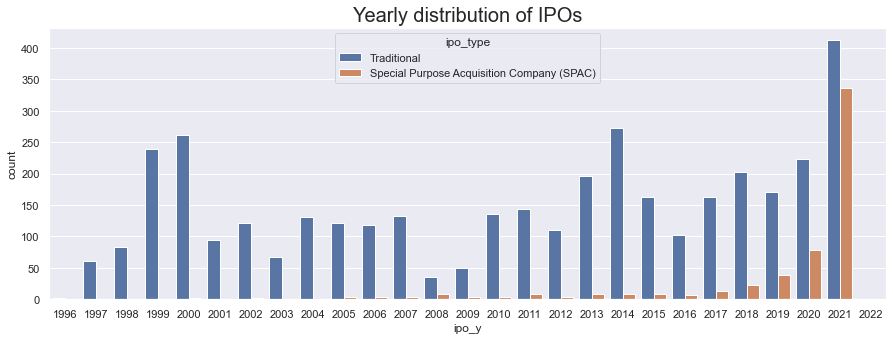

In [13]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(data= df, x= 'ipo_y', hue='ipo_type')
plt.title("Yearly distribution of IPOs", fontsize= 20)
plt.show()

In [14]:
df.loc[df.ipo_type=='Special Purpose Acquisition Company (SPAC)', 'ipo_type']='SPAC'
df.loc[df.ipo_type=='Traditional', 'ipo_type']='IPO'

--------------

### Make IPO and SPAC data sets

In [15]:
spac= df[df.ipo_type=='SPAC'].drop(columns='ipo_type')
print(spac.shape)
spac.tail(10)

(566, 13)


,company_fkey,ipo_tick,ipo_name,ipo_date,auditor_fkey_at_ipo,afees,lfees,rev,ni,ipo_price,ipo_shares,big4,ipo_y
9779,0001849011,APN'U,Apeiron Capital Investment Corp.,2021-11-09,8256.0,45000.0,250000.0,0.0,486473.0,10.0,15000000.0,0,2021
9794,0001849635,DWACU,Digital World Acquisition Corp.,2021-09-03,8256.0,40000.0,225000.0,0.0,-1384495.0,10.0,25000000.0,0,2021
9798,0001849820,CLAQU,cleantech Acquisition Corp.,2021-07-15,52.0,40000.0,225000.0,0.0,-595442.0,10.0,15000000.0,0,2021
9815,0001850487,GWIIU,Good Works II Acquisition Corp.,2021-07-12,161.0,55000.0,300000.0,0.0,-501610.0,10.0,20000000.0,0,2021
9885,0001855447,ROCGU,Roth CH Acquisition IV Co.,2021-08-06,8256.0,55000.0,225000.0,0.0,-402542.0,10.0,10000000.0,0,2021
9918,0001857086,DMAQU,Deep Medicine Acquisition Corp.,2021-10-27,151.0,25000.0,340000.0,0.0,-414045.0,10.0,11000000.0,0,2021
9949,0001860663,MTRYU,Monterey Bio Acquisition Corp,2021-10-01,8256.0,40000.0,250000.0,0.0,-583227.0,10.0,10000000.0,0,2021
9972,0001863428,SCMAU,Seaport Calibre Materials Acquisition Corp.,2021-10-28,11900.0,220000.0,915000.0,0.0,2045199.0,10.0,13000000.0,0,2021
10038,0001870778,OHAAU,Opy Acquisition Corp. I,2021-10-27,52.0,75000.0,300000.0,0.0,-347103.0,10.0,11000000.0,0,2021
10104,0001885998,ROCLU,Roth CH Acquisition V Co.,2021-12-01,6.0,40000.0,225000.0,0.0,-166644.0,10.0,10000000.0,0,2021


In [20]:
spac.ipo_price.value_counts()

10.00    531
8.00       7
6.00       4
5.00       3
16.00      2
14.00      2
25.00      2
13.00      1
1.50       1
2.25       1
24.00      1
3.75       1
4.00       1
5.05       1
8.50       1
4.25       1
23.00      1
19.00      1
17.00      1
9.00       1
5.25       1
12.00      1
Name: ipo_price, dtype: int64

In [16]:
ipo= df[df.ipo_type=='IPO'].drop(columns='ipo_type')
print(ipo.shape)
ipo.tail(10)

(3817, 13)


,company_fkey,ipo_tick,ipo_name,ipo_date,auditor_fkey_at_ipo,afees,lfees,rev,ni,ipo_price,ipo_shares,big4,ipo_y
10048,0001872529,MDXH,MDxHealth SA,2021-11-04,24121.0,180000.0,500000.0,2.223900e+07,-2.900200e+07,12.0,3750000.0,0,2021
10053,0001873835,IMMX,"Immix Biopharma, Inc.",2021-12-16,2349.0,100000.0,350000.0,0.000000e+00,-2.438388e+07,5.0,4200000.0,0,2021
10055,0001875444,ARHS,"Arhaus, Inc.",2021-11-04,1.0,2670805.0,2253305.0,7.969220e+08,2.111700e+07,13.0,12903226.0,1,2021
10056,0001874097,CYN,"Cyngn, Inc.",2021-10-20,8256.0,120000.0,550000.0,0.000000e+00,-7.799529e+06,7.5,3500000.0,0,2021
10057,0001874178,RIVN,"Rivian Automotive, Inc. / DE",2021-11-10,4.0,1050000.0,3000000.0,5.500000e+07,-4.688000e+09,78.0,153000000.0,1,2021
10059,0001874252,MYNZ,Mainz Biomed B.V.,2021-11-05,12498.0,167000.0,275000.0,5.773480e+05,-1.169010e+07,5.0,2000000.0,0,2021
10063,0001875091,NRSN,NeuroSense Therapeutics Ltd.,2021-12-09,4.0,200000.0,900000.0,0.000000e+00,-4.041000e+06,6.0,2000000.0,1,2021
10066,0001876183,IHS,IHS Holding Ltd,2021-10-14,1.0,1200000.0,3964000.0,1.579730e+09,-2.612100e+07,21.0,18000000.0,1,2021
10076,0001879726,SIDU,Sidus Space Inc.,2021-12-14,12498.0,80000.0,300000.0,1.408724e+06,-3.746138e+06,5.0,3000000.0,0,2021
10080,0001880343,VINE,"Fresh Vine Wine, Inc.",2021-12-14,26.0,160000.0,500000.0,1.700207e+06,-9.965627e+06,10.0,2200000.0,0,2021


--------------------

### Save data

In [17]:
spac.to_csv('data/aa_spac.csv', index= False)
ipo.to_csv('data/aa_ipo.csv', index= False)

### Close connection

In [18]:
conn.close()

-------------